In [9]:
import pandas as pd
import ast

df = pd.read_csv("micro_indo_cleaned_hashtags.csv")

Mean Squared Error: 2.227829274285714
R-squared: 0.5756202656423025


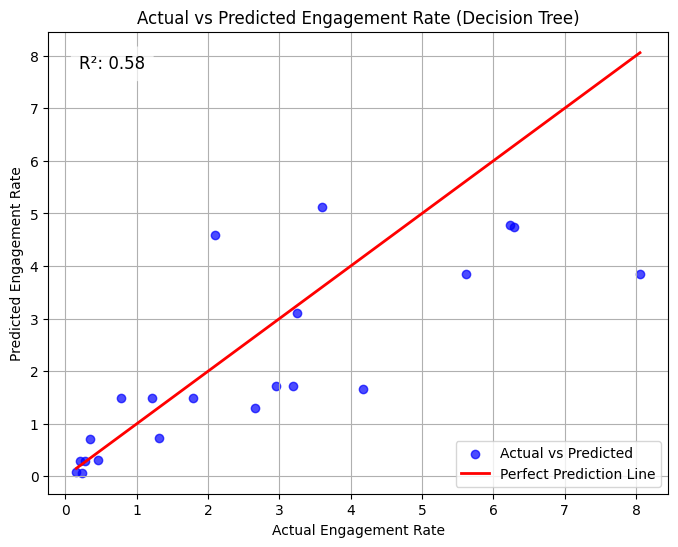

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

def process_hashtags(hashtags_column):
    # Convert the string representation of the dictionary into an actual dictionary
    def safe_eval(val):
        try:
            # Only apply eval if the value is a valid string representation of a dictionary
            return eval(val) if isinstance(val, str) else {}
        except:
            return {}

    hashtags_column = hashtags_column.apply(safe_eval)
    
    # Count the number of unique hashtags (length of the dictionary)
    hashtags_column = hashtags_column.apply(lambda x: len(x) if isinstance(x, dict) else 0)
    
    return hashtags_column


# Process the hashtags column in df
df['Hashtags_Count'] = process_hashtags(df['Hashtags_(dictionary)'])

df = df.drop(columns=['Hashtags_(dictionary)'])

# Drop 'Average_Engagement_Rate' from features to create independent variables
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Model with hashtags only
X_with_hashtags = X  # Includes Hashtags_Count

# Split data for the model with hashtags
X_train, X_test, y_train, y_test = train_test_split(X_with_hashtags, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model with hashtags
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_with_hashtags = model.predict(X_test)

# Print performance metrics with hashtags
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_with_hashtags)}')
print(f'R-squared: {r2_score(y_test, y_pred_with_hashtags)}')

# Optionally, plot to compare the performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_with_hashtags, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R²: {r2_score(y_test, y_pred_with_hashtags):.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Decision Tree)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 0.8427056585838413
R-squared: 0.8394727963855303


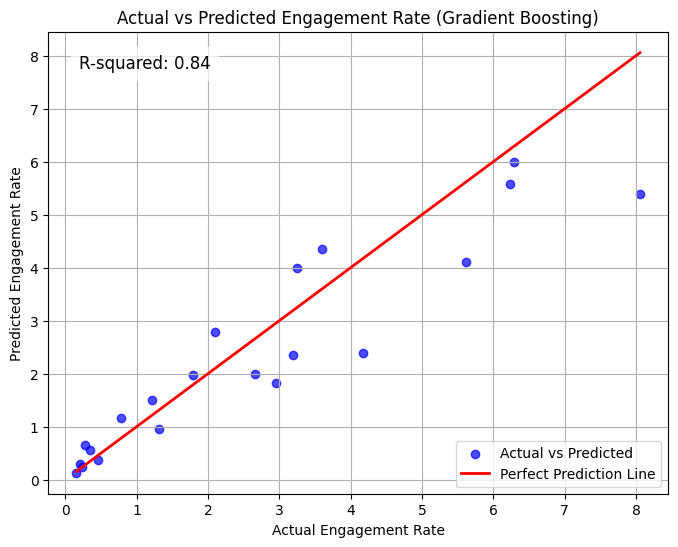

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_hashtags, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Gradient Boosting)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 3.5613700943245874
R-squared: 0.3215937540530378


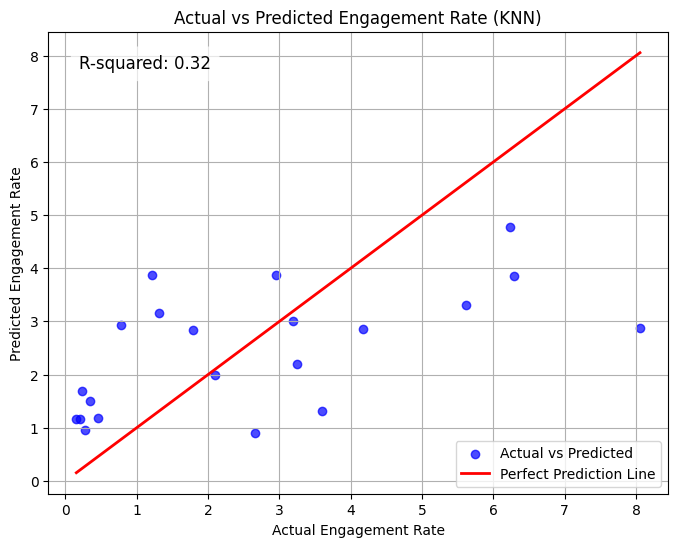

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_hashtags, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree Regressor model
model = KNeighborsRegressor(n_neighbors=7)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (KNN)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 1.8978928804689335
R-squared: 0.6384699286658727


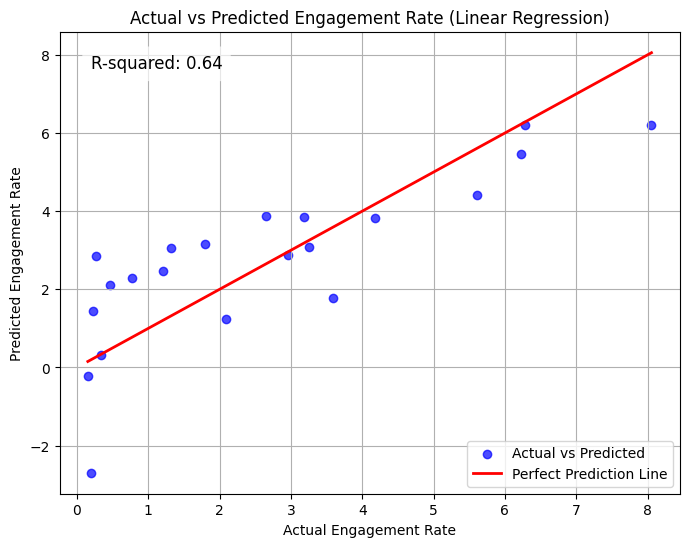

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Linear Regression)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 0.5985457354771432
R-squared: 0.8859828788702117


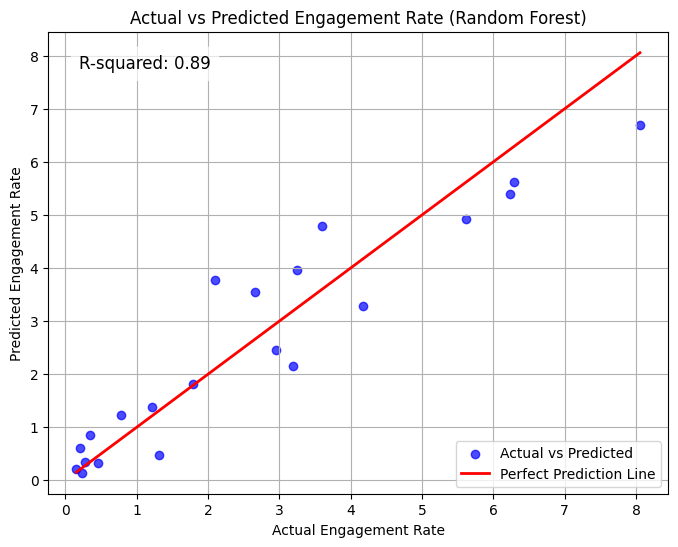

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Random Forest)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 1.6922785105439688
R-squared: 0.6776374594529249


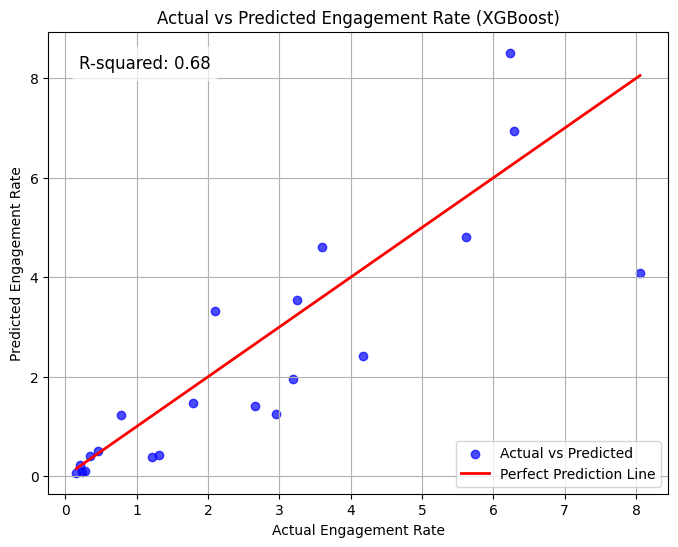

In [41]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (XGBoost)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()